In [1]:
import numpy as np 
import matplotlib.pyplot as plt



In [2]:
def stochastic():
    beta = 3.0*10**-4 #changed beta from 3*10**-3 to 3*10**-4
    mu = 0.1
    # Set up arrays to record event times, and values of S, I,R and t after after each event
    SVec = np.array([])
    IVec = np.array([])
    RVec = np.array([])
    tVec = np.array([])

    # Set up an array to record pre-determined times and values of I at those times
    tVals = np.array([i*0.5 for i in range(201)])
    IVals = np.array([0 for i in range(201)])
    # Set initial conditions and the initial time
    S = 10**3 - 10
    I = 10
    R = 0
    t = 0
    #store intial values
    IVals[0] = I
    SVec = np.append(SVec, S)
    IVec = np.append(IVec, I)
    RVec = np.append(RVec, R)
    tVec = np.append(tVec, t)
    
    #run until outbreak dies out or after 100 days
    while t < 100 and I>0:

        #use a random variable to determine when the next event takes place
        #and change the expected outcome using the values of beta,I,S and mu
        previous_time = t
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)
        new_time = t
        #then add the I value into the suitable slot 
        #if the new time value is now greater than a time grid value it wasn't greater than before
        #then store the I value in the complementary slot to said time grid value
        #this allows us to approximate the I value at each time in the time grid
        for i in range(201):
            if previous_time < tVals[i] <= new_time: #added in greater than previous time
                IVals[i] = I
        #use a second random variable and beta,I,S and mu to determine the outcome of the event and record its effect on S,I and R
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate: #error 2 added in the /totalrate
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
        #and store the outcomes of the event
        SVec = np.append(SVec, S)
        IVec = np.append(IVec, I)
        RVec = np.append(RVec, R)
        tVec = np.append(tVec, t)
    return(IVals)#return the array of I values corresponding to the times in the time grid

In [3]:
#I then generated a matrix contianing the average Ivalues from 4 samples at 201 different times
nrows=100
stochImat=np.zeros((nrows,201))
for i in range(0,nrows):
    stochImat[i]=stochastic()
meanIValarray=[]
for colnumber in range(0,201):
    values=[]
    meanposi=[]
    for rownumber in range(0,nrows):
        values = np.append(values,stochImat[rownumber,colnumber])   
    meanposi = np.mean(values)
    meanIValarray = np.append(meanIValarray, meanposi)
print(meanIValarray)

[ 10.    10.93  11.82  13.36  14.92  16.26  18.07  19.86  21.75  23.7
  26.28  28.96  31.93  35.35  38.74  42.1   46.48  50.67  55.27  60.24
  65.06  70.8   76.95  83.92  90.89  97.65 104.91 112.18 119.57 127.37
 135.93 144.78 153.96 163.84 172.47 182.01 191.64 201.35 209.45 218.95
 228.01 236.15 243.62 251.3  259.33 265.55 271.22 276.19 280.29 284.11
 287.46 289.75 292.19 293.66 294.66 294.61 293.83 293.15 292.12 290.21
 287.95 285.43 281.59 276.82 273.01 268.49 263.24 258.25 253.62 248.06
 243.12 237.73 231.27 225.67 220.74 214.77 209.   203.36 197.17 190.32
 185.21 179.9  174.43 169.31 164.06 158.68 153.4  148.   143.23 138.4
 133.99 129.77 124.91 120.78 116.14 111.72 107.33 103.09  99.47  96.23
  92.74  89.31  85.57  82.11  79.34  76.29  73.6   71.09  68.52  65.93
  63.37  61.05  58.53  56.73  54.64  52.48  50.32  48.14  46.46  44.87
  43.34  41.86  40.27  38.76  37.11  35.69  34.39  33.09  31.91  30.66
  29.7   28.34  27.33  26.17  24.96  23.97  22.84  21.9   21.15  20.16
  19.45 

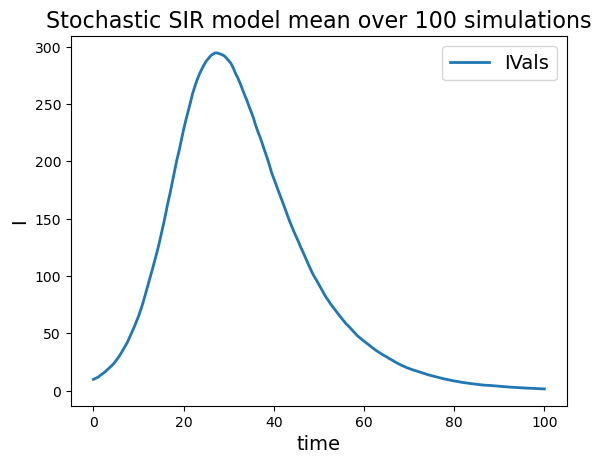

In [4]:
#I then plotted these mean I values over time

tVals = np.array([i*0.5 for i in range(201)])
plt.plot(tVals, meanIValarray, lw = 2, label = "IVals")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Stochastic SIR model mean over 100 simulations", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()